# Problem Statement
Consider the attached dataset about *advertising and sales*. The attributes denote the investments on advertising in TV, radio etc and the target variable is the **total sales**. 

AIM: to predict the sales from the investments on advertising.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

### Importing Data 

In [2]:
advertising_df = pd.read_csv('Advertising Dataset.csv', index_col = False)

In [3]:
advertising_df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
advertising_df = advertising_df[["TV", "radio", "newspaper", "sales"]]

In [5]:
advertising_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Part 1: Random division of data into 25% testing & 75% training subset 

In [6]:
#randomly split into 25% test & 75% training subset
advertising_df_train, advertising_df_test = train_test_split(advertising_df, test_size = 0.25)  
print (advertising_df_test.head())
print ("\n")
print (advertising_df_train.head())

        TV  radio  newspaper  sales
190   39.5   41.1        5.8   10.8
40   202.5   22.3       31.6   16.6
42   293.6   27.7        1.8   20.7
16    67.8   36.6      114.0   12.5
8      8.6    2.1        1.0    4.8


        TV  radio  newspaper  sales
142  220.5   33.2       37.9   20.1
80    76.4   26.7       22.3   11.8
45   175.1   22.5       31.5   14.9
158   11.7   36.9       45.2    7.3
2     17.2   45.9       69.3    9.3


In [7]:
print ("Size of testing subset is {} & of training subset is {}".format(advertising_df_test.shape, advertising_df_train.shape))

Size of testing subset is (50, 4) & of training subset is (150, 4)


>### Visualizing Pairwise Relationship

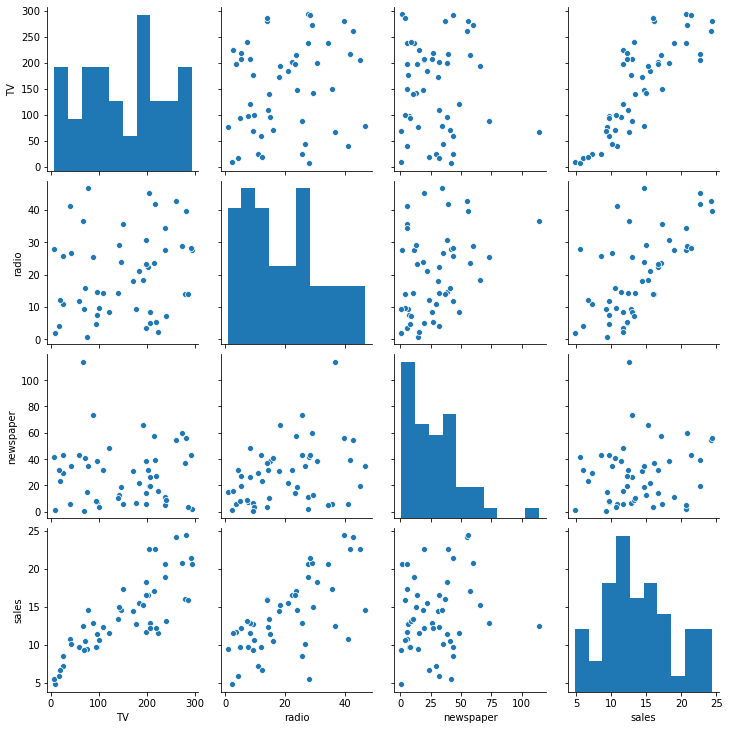

In [8]:
sb.pairplot(advertising_df_test)

> ### Seprating into Independent variables & Dependent varibles 

In [9]:
#iloc[x, y] do, responsible for acessing the compplete row by using index x & y for accesing row elements
#attribute Matix
X_test = pd.DataFrame(advertising_df_test.iloc[:, 0:3])
X_train = pd.DataFrame(advertising_df_train.iloc[:, 0:3])
Y_test = pd.DataFrame(advertising_df_test.iloc[:, 3])
Y_train = pd.DataFrame(advertising_df_train.iloc[:, 3])

## Part 2: Linear Regression 

Using Linear Regression, fit a model to predict the sales from investments using your own formula. Compare the coefficients as found by the python library function.

> ### Using base model to extract cofficient from Dataset for fit line

In [10]:
class least_squared_method(object):
    
    def __init__(self):
        self.coff = []

    # -- Heart of the model -- #
    def fit(self, X, Y):
        ones = np.ones(X.shape[0]).reshape(-1, 1)
        
        X = np.concatenate((ones, X), 1)

        self.coff = np.linalg.inv(X.transpose().dot(X)).dot( X.transpose().dot(Y))
    
    def predict(self, data):
        b0 = self.coff[0]
        other_coefficient = self.coff[1:]

        prediction = other_coefficient.transpose().dot(data) + b0
        
        return prediction

In [11]:
mine_model = least_squared_method()
mine_model.fit(X_train, Y_train)
mine_model.coff 

array([[ 2.65136199],
       [ 0.04738357],
       [ 0.19070844],
       [-0.00332532]])

In [12]:
def return_prediction_list(y_predicted, data):
    for arr in data.values: #X_test.values gives us the list of list of row data
        y_predicted.append(mine_model.predict(arr)[0])
    
y_predicted = []
return_prediction_list(y_predicted, X_train)
Y_train_prediction = Y_train.copy()
Y_train_prediction["Prediction"] = y_predicted

In [13]:
#actual versus predicted DataFrame
Y_train_prediction.head()

,sales,Prediction
142,20.1,19.304930
80,11.8,11.289228
45,14.9,15.134418
158,7.3,10.092587
2,9.3,11.989432


> ### Cofficients by Python Library Functions 

In [14]:
#By inbuilt Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, Y_train)
var = reg.coef_[0] #give list of coefficients m1, m2, m3 for equation y = m1*x1 + m2*x2 + m3*x3 + M
M = reg.intercept_[0]

In [15]:
inbuilt_model_coff = []
for y in var:
    inbuilt_model_coff.append("{:.8f}".format(y))
    
inbuilt_model_coff = ["{:.8f}".format(M)] + inbuilt_model_coff

mine_coff = []
for x in mine_model.coff:
    mine_coff.append("{:.8f}".format(x[0]))

> ### Comparsion in between the cofficients generated by formula & from python library functions

In [16]:
print ("Coefficients from formula: {}".format(mine_coff))
print ("-------------------------------")
print ("Coefficients from sklearn Linear Regression: {}".format(inbuilt_model_coff))

Coefficients from formula: ['2.65136199', '0.04738357', '0.19070844', '-0.00332532']
-------------------------------
Coefficients from sklearn Linear Regression: ['2.65136199', '0.04738357', '0.19070844', '-0.00332532']


## Part 3: Mean Squared Error on Test Set
Compute the mean squared error on the testing set.

In [17]:
y_predicted_test = []
return_prediction_list(y_predicted_test, X_test)
Y_test_prediction = Y_test.copy()
Y_test_prediction["Prediction"] = y_predicted_test

In [18]:
#Actaul versus predicted DataFrame
Y_test_prediction.head()

,sales,Prediction
190,10.8,12.341843
40,16.6,16.394253
42,20.7,21.839817
16,12.5,12.464811
8,4.8,3.456023


> ### Mean Squared Error

In [19]:
# Calculating the mean square error
mean_sq_error = []

for i in range(len(Y_test_prediction)):
    mean_sq_error.append((Y_test_prediction.iloc[i, 0] - Y_test_prediction.iloc[i, 1])**2)

MSE_test = sum(mean_sq_error)/len(Y_test_prediction)
MSE_test

1.9473488985616771

## Part 4: Ridge Regression

Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the coefficients against each other, and also compare the test set mean squared errors. 

In [20]:

class Ridge_Regression(object):


    def __init__(self):
        self.coff = []

    def fit(self, X, Y, alpha):
        ones = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((ones, X), 1)
  
        I = np.identity(X.shape[1])

        self.coff = np.linalg.inv(X.transpose().dot(X) + alpha*I).dot(X.transpose().dot(Y))
            
    def predict(self, data):
        b = self.coff[0]
        other_betas = self.coff[1:]

        prediction = data.dot(other_betas) + b
        return prediction

In [21]:
ridge_model = Ridge_Regression()
ridge_model.fit(X_train, Y_train, alpha = 2)
ridge_model.coff

array([[ 2.42588381e+00],
       [ 4.79899173e-02],
       [ 1.93339599e-01],
       [-2.01599177e-03]])

In [22]:
alpha = [0.5, 1, 5, 10, 50, 100]
mse_new = []
for i in alpha:
    ridge_model.fit(X_train, Y_train, alpha = i)
    Y_Pred = ridge_model.predict(X_test)    
    mse_new.append(np.square(np.subtract(Y_test, Y_Pred)).mean() / len(Y_Pred))

mse_new

[sales    0.039367
 dtype: float64,
 sales    0.039789
 dtype: float64,
 sales    0.04311
 dtype: float64,
 sales    0.046839
 dtype: float64,
 sales    0.062126
 dtype: float64,
 sales    0.068437
 dtype: float64]

> ### Comparing Mean Squared Error with different value of Alpha

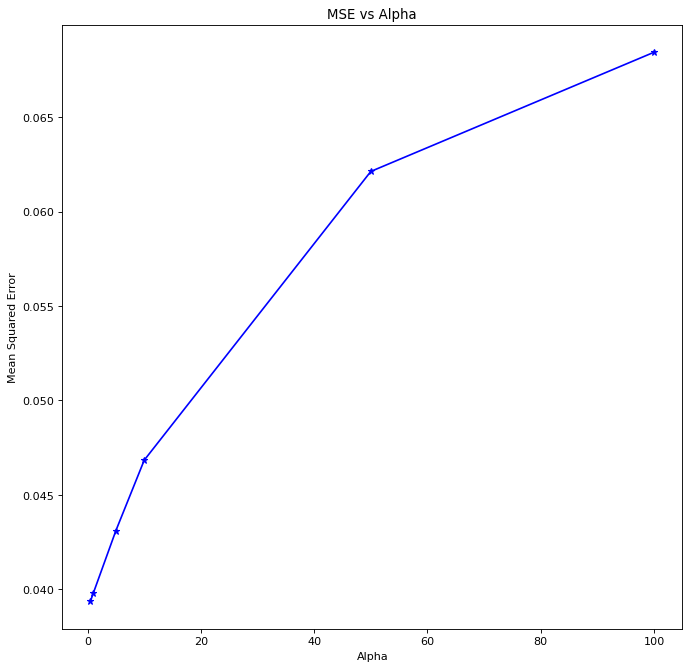

In [23]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('MSE vs Alpha')
plt.ylabel('Mean Squared Error')
plt.xlabel('Alpha')
plt.plot(alpha,mse_new,marker='*',color='b')

In [24]:
alpha = [0.5, 1, 5, 10, 50, 100]

para = []
for i in alpha:
    ridge_model.fit(X_train, Y_train, alpha=i)
    para.append(ridge_model.coff)

coff_idx = []
for i in range(len(para[0])):
    coff_idx.append(i)

In [25]:
para #for every alpha the cofficients are as follows

[array([[ 2.5911478 ],
        [ 0.04754549],
        [ 0.19141128],
        [-0.00297574]]),
 array([[ 2.53361065],
        [ 0.04770021],
        [ 0.19208276],
        [-0.00264166]]),
 array([[ 2.15149861e+00],
        [ 4.87279456e-02],
        [ 1.96538304e-01],
        [-4.21310065e-04]]),
 array([[1.81035858e+00],
        [4.96458957e-02],
        [2.00508123e-01],
        [1.56438853e-03]]),
 array([[0.7990399 ],
        [0.05237447],
        [0.21213631],
        [0.00751136]]),
 array([[0.47135192],
        [0.05326928],
        [0.21569809],
        [0.00952668]])]

> ### Comparing the Coefficients

In [26]:
mean_lst = []

for i in range(1, len(para[0])):
    sum = 0
    for j in range(len(para)):
        sum += para[j][i]
    
    sum = sum/len(para)
    mean_lst.append(sum)


par_mean = []
for i in range(len(para)):
    par_mean.append(para[i][np.argmax(mean_lst)])

max_lst = []
for i in range(len(para)):
    for j in range(1, len(para[0])-1):
        max = para[i][j]
        temp = para[i][j+1]
        if (temp > max):
            max = temp
    max_lst.append(max)

In [27]:
print (max_lst)
print ("------------")
print (par_mean)

[array([0.19141128]), array([0.19208276]), array([0.1965383]), array([0.20050812]), array([0.21213631]), array([0.21569809])]
------------
[array([0.04754549]), array([0.04770021]), array([0.04872795]), array([0.0496459]), array([0.05237447]), array([0.05326928])]


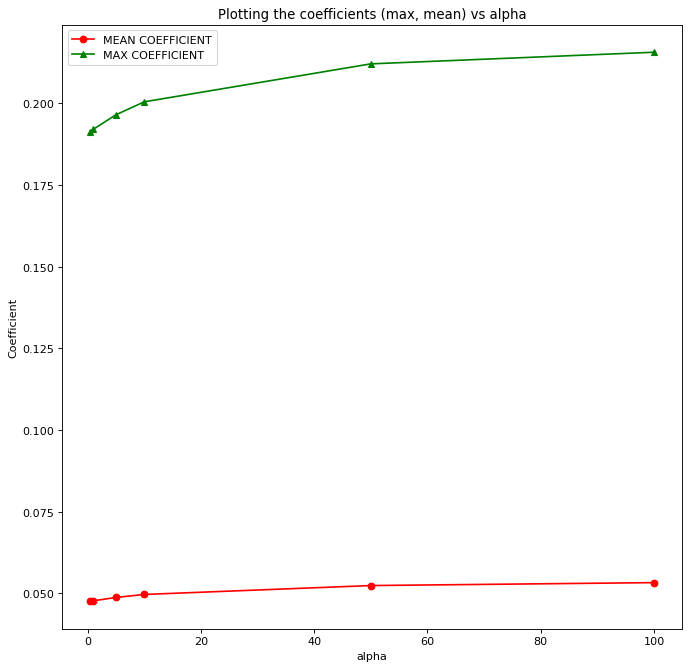

In [28]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Plotting the coefficients (max, mean) vs alpha')
plt.ylabel('Coefficient')
plt.xlabel('alpha')
plt.plot(alpha,par_mean,marker='o',color='r' ,label='MEAN COEFFICIENT')
plt.plot(alpha,max_lst,marker='^',color='g' ,label='MAX COEFFICIENT')
plt.legend()

## 5. Lasso Regression

Use the library function of "LASSO regression" to find out which of the 3 features is most important, i.e. whose coefficient is furthest from 0.

In [29]:
#Lasso Inbuilt Function from sklearn Module:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,Y_train)

print('Lasso Coefficient are: {}'.format(lasso.coef_))
print ("----------------------")
print('Farthest from zero coefficient identified is: {} '.format(lasso.coef_.max()))
y = str(X_train.columns[int(np.where(lasso.coef_ == lasso.coef_.max())[0])])

print('\n')
print('Lasso Regression coefficient of feature #' + str(np.where(lasso.coef_ == lasso.coef_.max())[0] + 1) + y + " is the farthest from" 
      + " 0 which means that " + y + " is the  most important feature") 
    

Lasso Coefficient are: [ 0.04736333  0.19009405 -0.00294606]
----------------------
Farthest from zero coefficient identified is: 0.1900940479488329 


Lasso Regression coefficient of feature #[2]radio is the farthest from 0 which means that radio is the  most important feature
